In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String, Float, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# Declare a Base using 'automap_base()'
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the measurement class to a variable called 'Measurement'
Measurement = Base.classes.measurement

# Assign the station class to a variable called 'Station'
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# measurement = session.query(Measurement)
# insp = inspect(engine)
# columns = insp.get_columns('Measurement')
# for column in columns:
#     print(column["name"], column["type"])

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
measurement = session.query(Measurement)
# for row in session.query(Measurement.date).limit(15).all():
#     print(row)
session.query(func.max(Measurement.date)).first()
# query = text("SELECT Date FROM measurement ORDER BY Date DESC LIMIT 1;") #WHERE Date >=2010-01-01;")
# with engine.connect() as conn:
#     data = conn.execute(query)

# for record in data:
#     print(record)

# recent_date = record
# print(recent_date)


('2017-08-23',)

In [12]:
# # Inspect Measurement Class
# insp = inspect(engine)
# columns_m = insp.get_columns('measurement')
# for column in columns_m:
#     print(column["name"], column["type"])

In [13]:
from sqlalchemy import text

# ...

with engine.begin() as conn:
    query = text("""SELECT * FROM Measurement""")
    df = pd.read_sql_query(query, conn)

df.head()

##Didn't work...possible my version of sqlalchemy is old/too new...
# # Put into a Pandas DataFrame
# # measurement = session.query(Measurement)
# measurement_df = pd.read_sql_query(
#                 sql = measurement.statement,
#                 con = engine
# )

# measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [595]:
# # The most recent date in the data set.
# print(df["date"].max())
# last_date = df[["date"]].max()
# last_date

Text(0, 0.5, 'Inches')

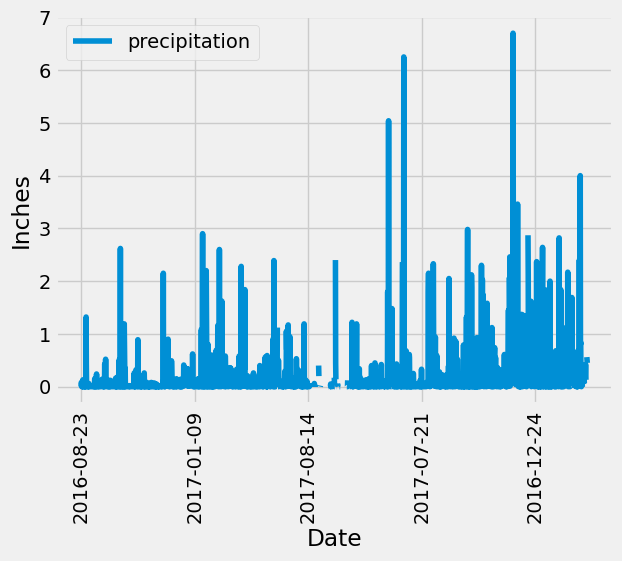

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(func.max(Measurement.date)).first()

# Calculate the date one year from the last date in data set.
date_one_year_ago  = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_one_year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query, columns=['date', 'precipitation'])

# # Sort the dataframe by date
# sorted_df = df.sort_values(['date'], ascending=True)
# clean_and_sorted_df = sorted_df.dropna(how='any')
# clean_and_sorted_df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


# x = clean_and_sorted_df['date']
# y = clean_and_sorted_df['precipitation']
# clean_and_sorted_df.plt(x, y, color = 'b', alpha = 0.5, align = 'center')

# plt.title('Exploratory Precipitation Analysis')
# #plt.xticks()

# plt.xlabel('Date')
# plt.ylabel('Precipitation (inches)')

# print("Text(0, 0.5, 'Inches')")
# plt.show()

In [619]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_and_sorted_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [620]:
# Design a query to calculate the total number of stations in the dataset
total_stations_query = session.query(func.count(Station.station)).all()
total_stations_query

[(9,)]

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_query = session.query((Measurement.station),func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_query



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [622]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query((Measurement.station),func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
#print(most_active_station)
temps_query = session.query((func.min(Measurement.tobs)),(func.max(Measurement.tobs)),(func.avg(Measurement.tobs))).group_by(Measurement.station == Measurement.id).filter_by(station ='USC00519281').first()
print(temps_query)

(54.0, 85.0, 71.66378066378067)


In [601]:
# # Using the most active station id
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# active_query = session.query((Measurement.station),func.count(Measurement.station)).group_by(Measurement.id).order_by(func.count(Measurement.station).desc()).first()
# active_query

# # Design a query to retrieve the last 12 months of tobs data and plot the results. 
# # Starting from the most recent data point in the database. 
# check = session.query(func.max(Measurement.date)).group_by(Measurement.station == Measurement.id).filter_by(station ='USC00519281').first()
# #print(check)
# # Calculate the date one year from the last date in data set.
# date_one_year_ago_check  = dt.date(2017, 8, 18) - dt.timedelta(days=365)
# #print(date_one_year_ago_check)

# # Perform a query to retrieve the data and tobs data
# query_check = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= date_one_year_ago_check).all()
# query_check

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# df_tobs = pd.DataFrame(query_check, columns=['date','tobs'])
# df_tobs


# # Sort the dataframe by date
# sorted_df_tobs = df_tobs.sort_values(['date'], ascending=True)
# clean_and_sorted_df_tobs = sorted_df_tobs.dropna(how='any')
# clean_and_sorted_df_tobs

# # Use Pandas Plotting with Matplotlib to plot the data

# tobs= clean_and_sorted_df_tobs['tobs']
# #tobs
# bins = len(tobs)
# #bins
# plt.hist(tobs)
# #plt.hist(tobs,bins=bins, edgecolor='black')

# plt.title('Temperature Observation Histogram - Station USC00519281')
# #plt.xticks()

# plt.xlabel('Temperature')
# plt.ylabel('Frequency')

# print("Text(0.5, 4.183333333333314, 'Temperature')")
# plt.show()


Text(0.5, 4.183333333333314, 'Temperature')

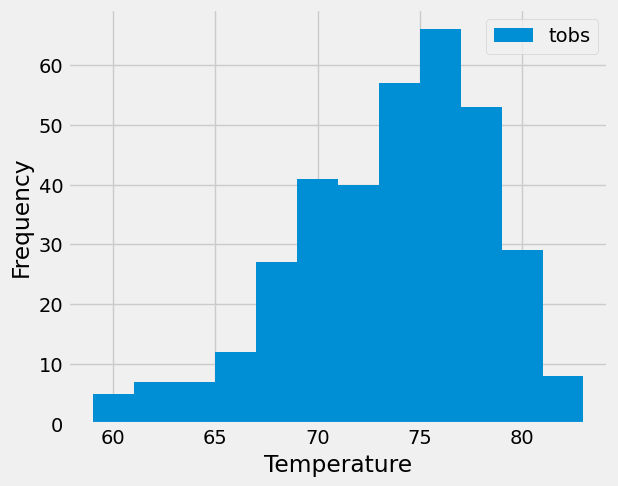

In [623]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
##This entire cell came from AskBCS...I still don't understand most of the material in this entire python file.
import datetime as dt
from pandas.plotting import table
date_one_year_ago_check = dt.date(2017, 8, 23) - dt.timedelta(days=365)

query_check = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= date_one_year_ago_check).all()
df_tobs = pd.DataFrame(query_check, columns=['tobs'])
df_tobs.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

In [625]:
#measurement class
Measurement = Base.classes.measurement

#station class
Station = Base.classes.station

In [643]:
#join measurement and station tables on station
#session.query(Measurement.station,Station.station).all()
same_station = session.query(Measurement,Station).filter(Measurement.station==Station.station).limit(10).all()

AttributeError: 'InstanceState' object has no attribute '_post_inspect'

# Close Session

In [603]:
# Close Session
session.close()